# 保存模型

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in np, pd ,sklearn, tf, keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:

fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
#x = (x - u) / std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaler = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaler = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)


In [4]:
#tf.keras.models.Sequential()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =[28,28]),
    keras.layers.Dense(64,activation='relu'),
#     keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10)#,activation='softmax')
])    
# relu:  y=max(0,x)
# softmax:将向量变成概率分布，x =[x1,x2,x3]
#                y=[e^x1/sum,e^x2/sum,e^x3/sum], sum=e^x1+e^x2+e^x36

# sparse的原因：将y的分类转换为one_hot编码
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer = 'sgd',
             metrics = ['accuracy'])


In [5]:
#在fit里添加callback:TensorBoard,EarlyStopping,ModelCheckpoint
#查看TensorBoard命令：
#tensorboard --lodger=callbacks然后用浏览器访问
# 例子：
# (mytf) mac:data mac$ tensorboard --logdir=callback
# Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
# TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)


logdir= 'data/graph_def_and_weights'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file= os.path.join(logdir,
                                          'fashion_mnist_model.h5')

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(
            output_model_file,
            save_best_only=True,
            save_weights_only= False# 默认False保存模型结构加参数True时之保存参数
               ),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]
history = model.fit(x_train_scaler,y_train,epochs=10,
         validation_data=(x_valid_scaler,y_valid),
        callbacks= callbacks)
#validation_data:训练过程中在验证集验证

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 225us/sample - loss: 0.5637 - accuracy: 0.8006 - val_loss: 0.4459 - val_accuracy: 0.8470
Epoch 2/10
55000/55000 [==============================] - 9s 172us/sample - loss: 0.4258 - accuracy: 0.8473 - val_loss: 0.3926 - val_accuracy: 0.8660
Epoch 3/10
55000/55000 [==============================] - 9s 170us/sample - loss: 0.3905 - accuracy: 0.8608 - val_loss: 0.3867 - val_accuracy: 0.8636
Epoch 4/10
55000/55000 [==============================] - 10s 189us/sample - loss: 0.3691 - accuracy: 0.8686 - val_loss: 0.3841 - val_accuracy: 0.8652
Epoch 5/10
55000/55000 [==============================] - 10s 182us/sample - loss: 0.3539 - accuracy: 0.8745 - val_loss: 0.3573 - val_accuracy: 0.8756
Epoch 6/10
55000/55000 [==============================] - 10s 190us/sample - loss: 0.3409 - accuracy: 0.8773 - val_loss: 0.3531 - val_accuracy: 0.8768
Epoch 7/10
55000/55000 [=======================

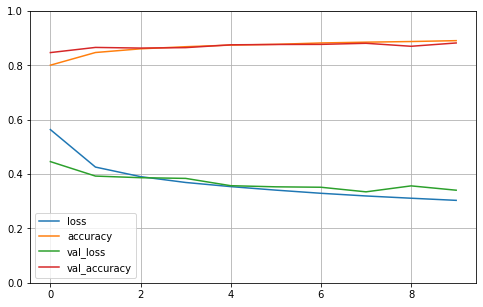

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [8]:
model.evaluate(x_test_scaler,y_test,verbose = 2)

10000/1 - 1s - loss: 0.2345 - accuracy: 0.8621


[0.37775337027311323, 0.8621]

In [10]:
# 载入模型
loaded_model = keras.models.load_model(output_model_file)
loaded_model.evaluate(x_test_scaler,y_test,verbose = 2)

10000/1 - 1s - loss: 0.2522 - accuracy: 0.8657


[0.375290252828598, 0.8657]

In [11]:
# save_weights_only= True 只保存参数
logdir= 'data/fashion_mnist_weights'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file= os.path.join(logdir,
                                          'fashion_mnist_model.h5')

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(
            output_model_file,
            save_best_only=True,
            save_weights_only= True# 默认False保存模型结构加参数True时之保存参数
               ),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]
history = model.fit(x_train_scaler,y_train,epochs=10,
         validation_data=(x_valid_scaler,y_valid),
        callbacks= callbacks)
#validation_data:训练过程中在验证集验证

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 211us/sample - loss: 0.2958 - accuracy: 0.8934 - val_loss: 0.3391 - val_accuracy: 0.8794
Epoch 2/10
55000/55000 [==============================] - 11s 198us/sample - loss: 0.2894 - accuracy: 0.8962 - val_loss: 0.3244 - val_accuracy: 0.8822
Epoch 3/10
55000/55000 [==============================] - 12s 211us/sample - loss: 0.2834 - accuracy: 0.8971 - val_loss: 0.3297 - val_accuracy: 0.8836
Epoch 4/10
55000/55000 [==============================] - 14s 246us/sample - loss: 0.2776 - accuracy: 0.8999 - val_loss: 0.3241 - val_accuracy: 0.8848
Epoch 5/10
55000/55000 [==============================] - 10s 187us/sample - loss: 0.2720 - accuracy: 0.9021 - val_loss: 0.3222 - val_accuracy: 0.8852
Epoch 6/10
55000/55000 [==============================] - 11s 204us/sample - loss: 0.2677 - accuracy: 0.9037 - val_loss: 0.3160 - val_accuracy: 0.8884
Epoch 7/10
55000/55000 [=====================

In [13]:
model.evaluate(x_test_scaler,y_test,verbose = 2)

10000/1 - 1s - loss: 0.2021 - accuracy: 0.8696


[0.36148146598935127, 0.8696]

In [12]:
# 载入模型
loaded_model = keras.models.load_model(output_model_file)
loaded_model.evaluate(x_test_scaler,y_test,verbose = 2)

# 因为只保存了参数，所以运行出错，09_2.如何使用参数

ValueError: No model found in config file.

In [ ]:
# model.sample_weights('路径')#直接保存模型参数
# model.save('路径')# 直接保存模型全部参数